# Convolutional Autoencoder in Keras

In [0]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [0]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [0]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
               # callbacks=[TensorBoard(log_dir='/tmp/autoencoder')]
               )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 166s 3ms/step - loss: 0.1235 - val_loss: 0.1302
Epoch 2/10
60000/60000 [==============================] - 167s 3ms/step - loss: 0.1224 - val_loss: 0.1220
Epoch 3/10
60000/60000 [==============================] - 166s 3ms/step - loss: 0.1221 - val_loss: 0.1215
Epoch 4/10
60000/60000 [==============================] - 167s 3ms/step - loss: 0.1222 - val_loss: 0.1177
Epoch 5/10
60000/60000 [==============================] - 167s 3ms/step - loss: 0.1218 - val_loss: 0.1202
Epoch 6/10
60000/60000 [==============================] - 164s 3ms/step - loss: 0.1214 - val_loss: 0.1189
Epoch 7/10
60000/60000 [==============================] - 163s 3ms/step - loss: 0.1210 - val_loss: 0.1187
Epoch 8/10
60000/60000 [==============================] - 162s 3ms/step - loss: 0.1210 - val_loss: 0.1183
Epoch 9/10
60000/60000 [==============================] - 164s 3ms/step - loss: 0.1204 - val_loss: 0.1

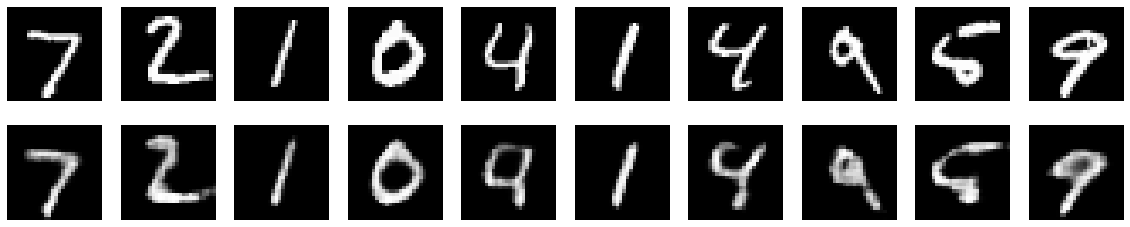

In [0]:
import matplotlib.pyplot as plt

decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

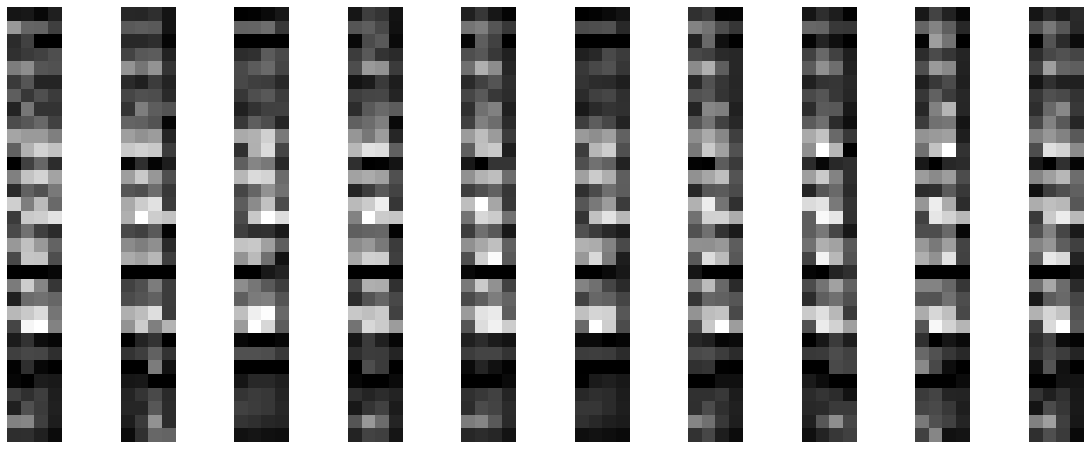

In [0]:
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(4, 4 * 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Denoising autoencoder

Train a denoising autoencoder by adding random noise before training!

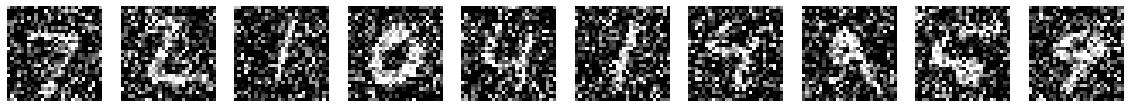

In [0]:
# Add random noise before training!
noise_factor = 0.5 
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
x_train_noisy = np.clip(x_train_noisy, 0., 1.) 
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
#show_imgs(x_test_noisy)

In [0]:
# it takes more epochs to converge
autoencoder.fit(x_train_noisy, x_train, nb_epoch=10, batch_size=128,
                shuffle=True, validation_data=(x_test_noisy, x_test))


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 172s 3ms/step - loss: 0.3984 - val_loss: 0.3997
Epoch 2/10
60000/60000 [==============================] - 174s 3ms/step - loss: 0.3068 - val_loss: 0.2545
Epoch 3/10
60000/60000 [==============================] - 171s 3ms/step - loss: 0.2692 - val_loss: 0.2351
Epoch 4/10
60000/60000 [==============================] - 175s 3ms/step - loss: 0.2385 - val_loss: 0.2295
Epoch 5/10
60000/60000 [==============================] - 173s 3ms/step - loss: 0.2245 - val_loss: 0.2820
Epoch 6/10
60000/60000 [==============================] - 177s 3ms/step - loss: 0.2112 - val_loss: 0.2028
Epoch 7/10
60000/60000 [==============================] - 173s 3ms/step - loss: 0.1981 - val_loss: 0.1865
Epoch 8/10
60000/60000 [==============================] - 172s 3ms/step - loss: 0.1925 - val_loss: 0.1846
Epoch 9/10
60000/60000 [==============================] - 174s 3ms/step - loss: 0.2034 - val_loss: 0.1

denoising


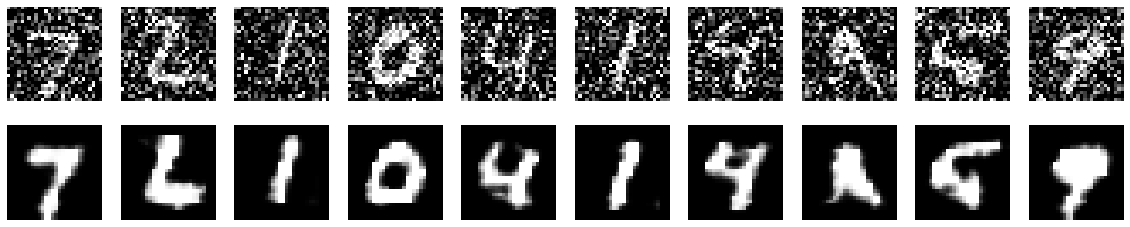


of course, it works with original noise-less images


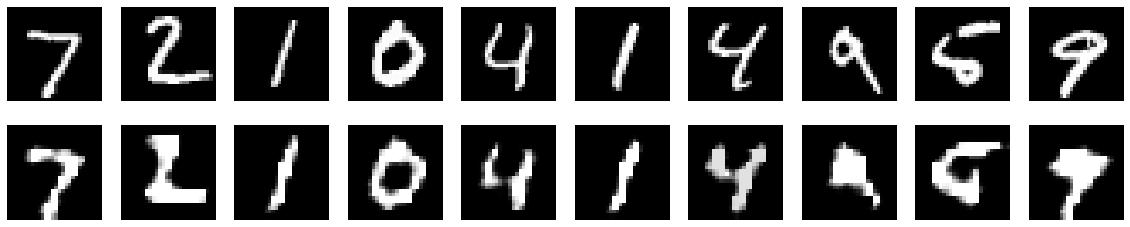

In [0]:
# denoising
print "denoising"
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()



#show_imgs(x_test_noisy, decoded_imgs)

# what if we feed the original noise-free test images?
print "\nof course, it works with original noise-less images"
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


#show_imgs(x_test, decoded_imgs) # yes, it works well without noise!

Training history


Text(0.5,1,'validation loss')

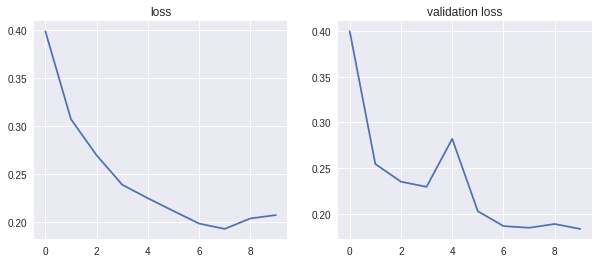

In [0]:
print "Training history"
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1, 2, 1)
plt.plot(autoencoder.history.history['loss'])
ax1.set_title('loss')
ax2 = fig.add_subplot(1, 2, 2)
plt.plot(autoencoder.history.history['val_loss'])
ax2.set_title('validation loss')